# Difference in Differences with `pymc` models

In [1]:
import arviz as az
import causalpy as cp

In [2]:
# %config InlineBackend.figure_format = 'svg'
az.style.use("arviz-darkgrid")

In [3]:
%load_ext autoreload
%autoreload 2

## Load data

In [4]:
df = cp.load_data("did")
df.head()

,group,t,unit,treated,y
0,0,0.0,0,0,1.037235
1,0,1.0,0,0,2.180333
2,1,0.0,1,0,1.181521
3,1,1.0,1,1,2.573195
4,0,0.0,2,0,1.237781


## Run the analysis

In [5]:
result = cp.pymc_experiments.DifferenceInDifferences(
    df,
    formula="y ~ 1 + group + t + treated:group",
    time_variable_name="t",
    group_variable_name="group",
    treated=1,
    untreated=0,
    prediction_model=cp.pymc_models.LinearRegression(),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


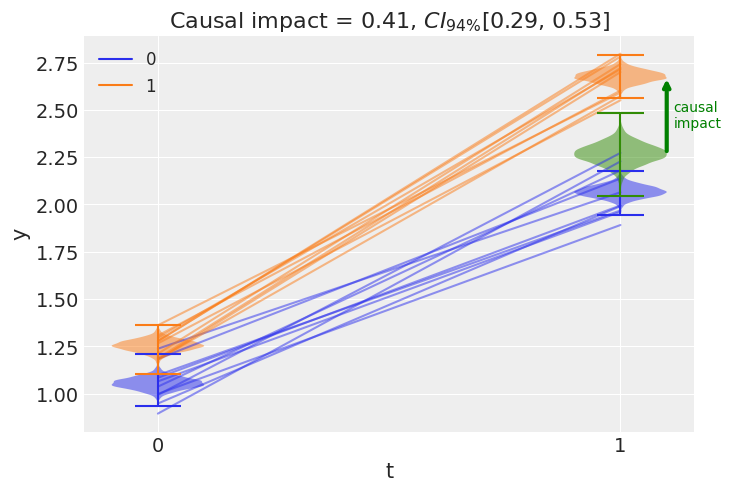

In [6]:
fig, ax = result.plot()

In [7]:
result.summary()

===========================Difference in Differences============================
Formula: y ~ 1 + group + t + treated:group

Results:
Causal impact = 0.41, $CI_{94\%}$[0.29, 0.53]
Model coefficients:
  Intercept                     1.05, 94% HDI [1.00, 1.12]
  group                         0.20, 94% HDI [0.11, 0.28]
  t                             1.01, 94% HDI [0.93, 1.10]
  treated:group                 0.41, 94% HDI [0.29, 0.53]
  sigma                         0.10, 94% HDI [0.08, 0.13]


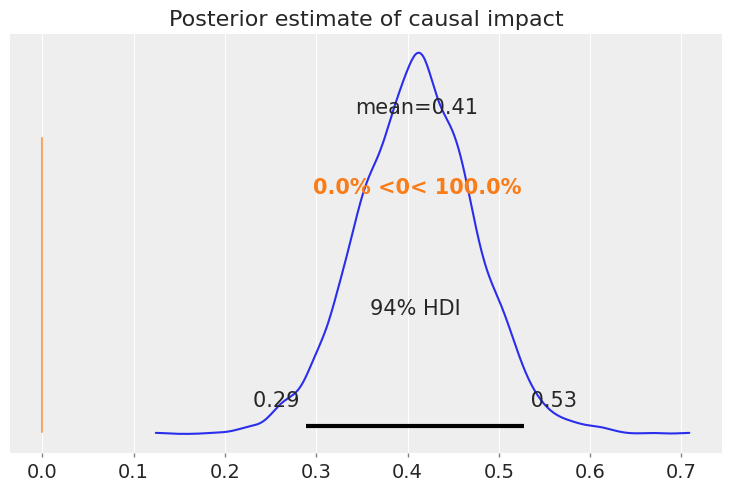

In [8]:
ax = az.plot_posterior(result.causal_impact, ref_val=0)
ax.set(title="Posterior estimate of causal impact");